#### Sentiment Class

In [2]:
import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"
    
class Review:
    def __init__(self,text,score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
    
    def get_sentiment(self):
        if self.score <=2:
            return Sentiment.NEGATIVE
        elif self.score==3:
            return Sentiment.NEUTRAL
        else: # Score greater than 3
            return Sentiment.POSITIVE
        
class ReviewContainer:
    def __init__(self,reviews):
        self.reviews = reviews 
    
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        

    
    def evenly_distribute(self):
        negative = list(filter(lambda x : x.sentiment == Sentiment.NEGATIVE,self.reviews))
        positive = list(filter(lambda x : x.sentiment == Sentiment.POSITIVE,self.reviews))
        
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
            
    
    

#### Loading data from JSON file

In [3]:
import json
file_name='C:/Users/PV/Books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'],review['overall']))
        
reviews[5].sentiment

'POSITIVE'

#### Prepping of data 

In [4]:
from sklearn.cross_validation import train_test_split
training , test = train_test_split(reviews,test_size=0.33,random_state=42)

train_container = ReviewContainer(training)
test_container = ReviewContainer(test)


In [5]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))
print(len(test_y))

436
436
416


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

In [7]:
print(train_x_vectors[0].toarray())
print(train_x[0])

[[ 0.  0.  0. ...,  0.  0.  0.]]
I love this book! All of the characters are were well worked. The story line was great. Ne Ne Capri did that!


### Linear SVM

In [8]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear')
clf_svm.fit(train_x_vectors , train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Evaluation of the SVM Model Classifier

In [9]:
# Predicting mean accuracy of model using score method
clf_svm.score(test_x_vectors,test_y)

0.80769230769230771

In [10]:
# Calculating F1 scores
from sklearn.metrics import f1_score
f1_score(test_y,clf_svm.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])

array([ 0.80582524,  0.80952381])

In [11]:
test_set = ['Bad book ','Great book','Horrible waste of time']
new_set = vectorizer.transform(test_set)
clf_svm.predict(new_set)

array(['NEGATIVE', 'POSITIVE', 'NEGATIVE'], 
      dtype='<U8')

### Fine Tuning Model Using Grid Search

In [12]:
from sklearn import svm, grid_search, datasets
parameters = {'kernel':('linear','rbf'),'C':[1,2,4,8,16]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(train_x_vectors,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 2, 4, 8, 16]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

### Saving Model

In [125]:
import pickle
with open('C:/Users/PV/Models/sentiment_classifier.pkl','wb') as f:
    pickle.dump(clf,f)

### Loading Model

In [126]:
with open('C:/Users/PV/Models/sentiment_classifier.pkl','rb') as f:
    loaded_clf = pickle.load(f)
    

In [129]:
print(test_x[1])
loaded_clf.predict(test_x_vectors[1])

Once again this is s great suspenseful love triangle. I can't wait to read more about this book. Let's go to the next novel. Hope everyone enjoys this series as much as I do.


array(['POSITIVE'], 
      dtype='<U8')

### Confusion Matrix

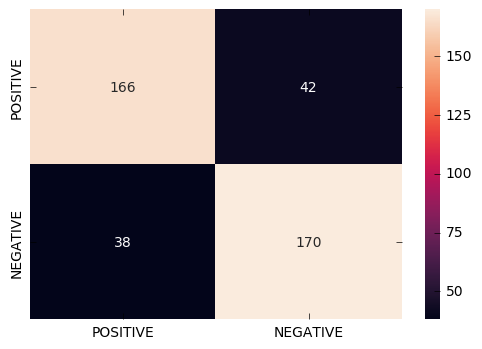

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib as plt
import pandas as pd
cm = confusion_matrix(test_y,clf.predict(test_x_vectors), labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])
labels = [Sentiment.POSITIVE , Sentiment.NEGATIVE]
df_cm = pd.DataFrame(cm,index=labels,columns=labels)

sn.heatmap(df_cm,annot=True,fmt='d')


